In [1]:
import pandas as pd 
import numpy as np

In [2]:
car = pd.read_csv('./quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Clearning

In [6]:
backup = car.copy()

In [7]:
car = car[car['year'].str.isnumeric()]

In [8]:
car['year'] = car['year'].astype(int)

In [9]:
car = car[car['Price'] != "Ask For Price"]

In [10]:
car['Price']= car['Price'].str.replace(',','').astype(int)

In [11]:
car['kms_driven']= car['kms_driven'].str.split(" ").str.get(0).str.replace(',','')

In [12]:
car = car[car['kms_driven'].str.isnumeric()]

In [13]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [15]:
car=car[~car['fuel_type'].isna()]

In [16]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [17]:
car = car.reset_index(drop=True)

In [18]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [19]:
car = car[car['Price']<4e6].reset_index(drop=True)

In [20]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [21]:
car.to_csv("Cleaned car.csv")

In [22]:
X = car.drop(columns='Price')
y = car['Price']

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rudra\AppData\Local\Temp\ipykernel_8008\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


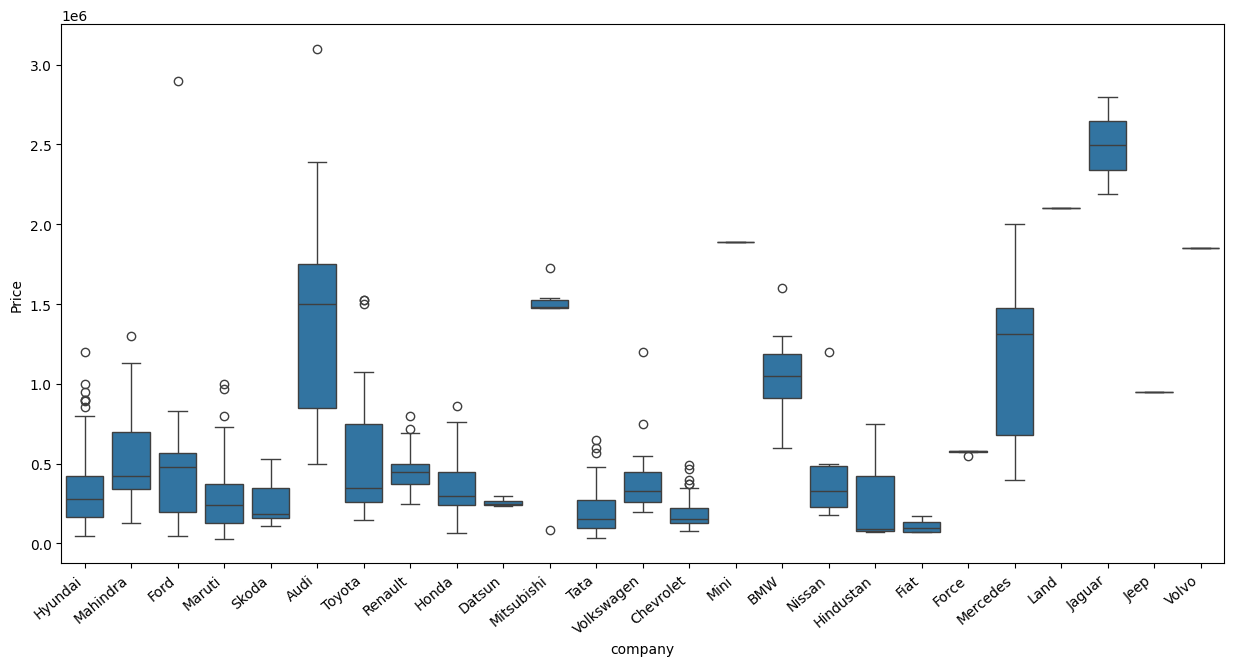

In [24]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

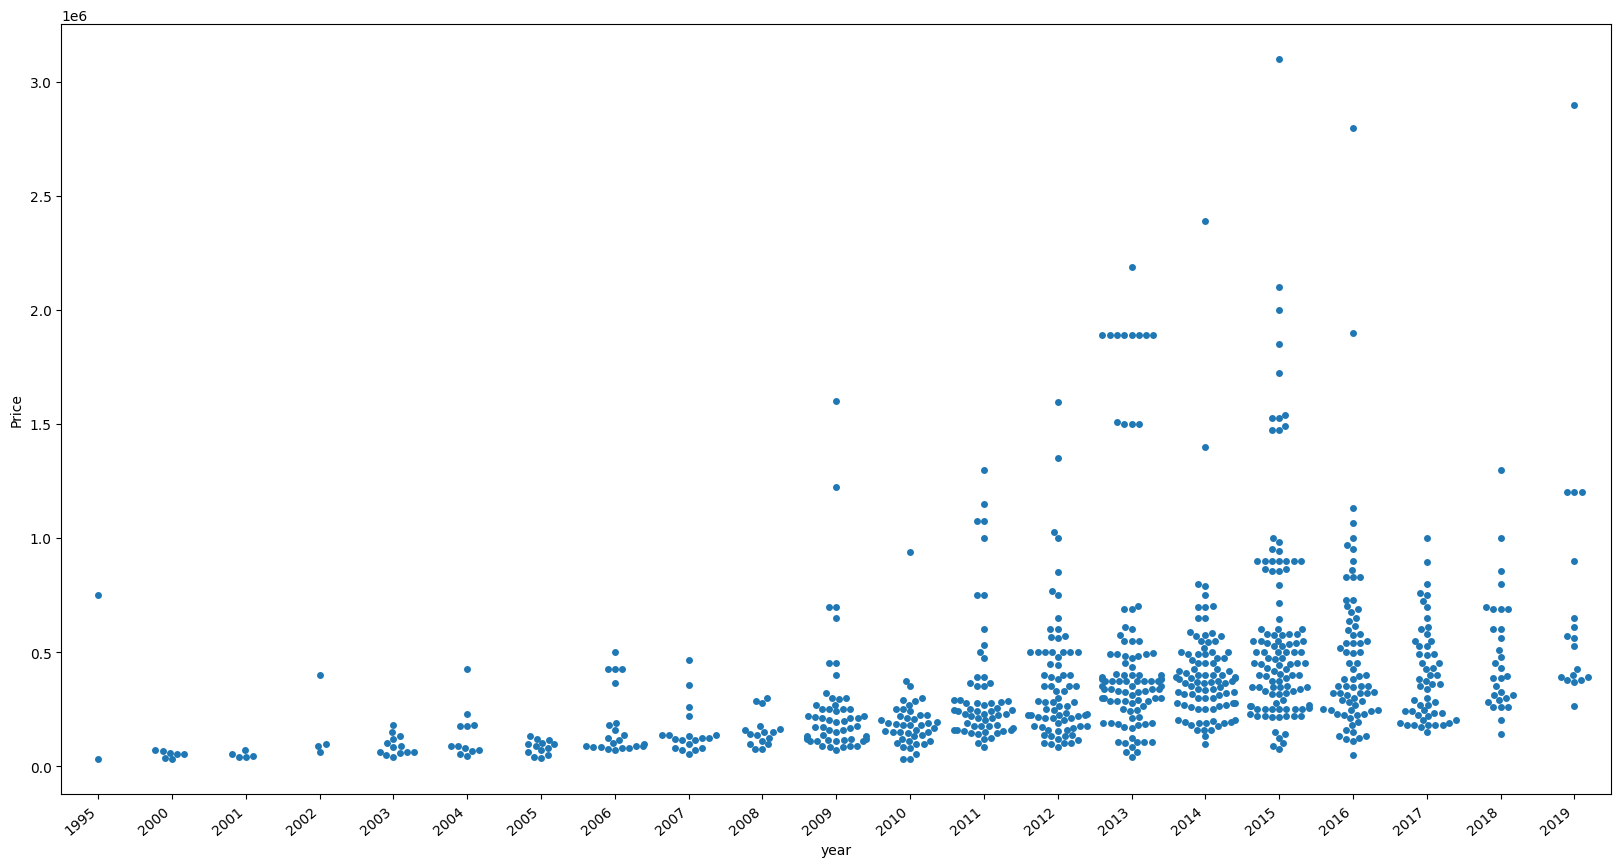

In [25]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [28]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [29]:
ct = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [30]:
lr = LinearRegression()

In [31]:
pipe = make_pipeline(ct,lr)

In [32]:
pipe.fit(X_train,y_train)

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [33]:
y_pred = pipe.predict(X_test)

In [34]:
r2_score(y_test,y_pred)

0.572697356273703

In [35]:
scores =[]
for i in range(1000):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(ct,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(pipe.score(X_test,y_test))

In [36]:
np.argmax(scores)

np.int64(433)

In [37]:
scores[np.argmax(scores)]

0.8457046438151008

In [38]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=433)
lr = LinearRegression()
pipe = make_pipeline(ct,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8457046438151008

In [39]:
import pickle

In [40]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [41]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2022,60000,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([529481.05051386])